<a href="https://colab.research.google.com/github/bstrain71/nu-software-survey/blob/master/Strain_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [0]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

import warnings; warnings.simplefilter('ignore') # supress depreciation warnings

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv("https://raw.githubusercontent.com/bstrain71/nu-software-survey/master/mspa-survey-data.csv")

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
# print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
# print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
#print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
#print(pd.DataFrame.head(valid_survey_input)) 

In [0]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

## EDA

In [42]:
pd.DataFrame.describe(survey_df)


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


In [49]:
survey_df[['My_Python','My_R']].corr(method = 'pearson')



,My_Python,My_R
My_Python,1.000000,-0.374659
My_R,-0.374659,1.000000


In [50]:
survey_df[['Prof_Python','Prof_R']].corr(method = 'pearson')


,Prof_Python,Prof_R
Prof_Python,1.000000,-0.362159
Prof_R,-0.362159,1.000000


In [51]:
survey_df[['Ind_Python','Ind_R']].corr(method = 'pearson')


,Ind_Python,Ind_R
Ind_Python,1.00000,-0.20461
Ind_R,-0.20461,1.00000


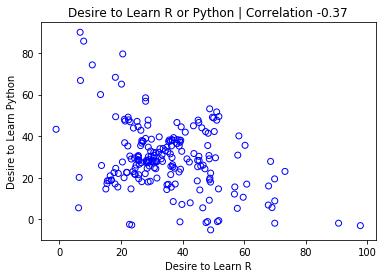

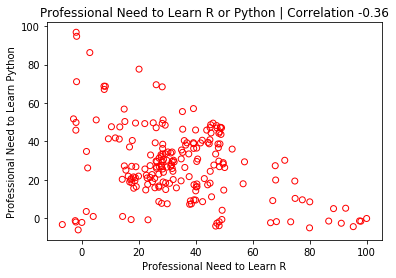

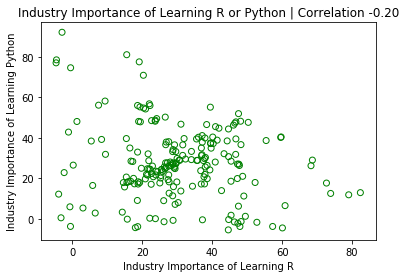

In [57]:
                     
# R vs Python
fig, axis = plt.subplots()
axis.set_xlabel('Desire to Learn R')
axis.set_ylabel('Desire to Learn Python')
plt.title('Desire to Learn R or Python | Correlation -0.37')

# plot of personal desire to learn
scatter_plot = axis.scatter(
    survey_df['My_R'] + np.random.normal(-2, 2,
                                         len(survey_df['My_R'])), 
    survey_df['My_Python'] + np.random.normal(-2, 2,
                                              len(survey_df['My_Python'])),
    facecolors = 'none', 
    edgecolors = 'blue')

# plot of professional need
fig, axis = plt.subplots()
axis.set_xlabel('Professional Need to Learn R')
axis.set_ylabel('Professional Need to Learn Python')
plt.title('Professional Need to Learn R or Python | Correlation -0.36')

scatter_plot = axis.scatter(
    survey_df['Prof_R'] + np.random.normal(-2, 2,
                                         len(survey_df['Prof_R'])), 
    survey_df['Prof_Python'] + np.random.normal(-2, 2,
                                              len(survey_df['Prof_Python'])),
    facecolors = 'none', 
    edgecolors = 'red') 

# plot of industry importance
fig, axis = plt.subplots()
axis.set_xlabel('Industry Importance of Learning R')
axis.set_ylabel('Industry Importance of Learning Python')
plt.title('Industry Importance of Learning R or Python | Correlation -0.20')

scatter_plot = axis.scatter(
    survey_df['Ind_R'] + np.random.normal(-2, 2,
                                         len(survey_df['Ind_R'])), 
    survey_df['Ind_Python'] + np.random.normal(-2, 2,
                                              len(survey_df['Ind_Python'])),
    facecolors = 'none', 
    edgecolors = 'green') 


Scale the preference variables to see if the correlation changes.

In [0]:
survey_df['My_R_binary'] = np.where(survey_df['My_R']>=50, 1, 0)
survey_df['My_Python_binary'] = np.where(survey_df['My_Python']>=50, 1, 0)
survey_df['Prof_R_binary'] = np.where(survey_df['Prof_R']>=50, 1, 0)
survey_df['Prof_Python_binary'] = np.where(survey_df['Prof_Python']>=50, 1, 0)
survey_df['Ind_R_binary'] = np.where(survey_df['Ind_R']>=50, 1, 0)
survey_df['Ind_Python_binary'] = np.where(survey_df['Ind_Python']>=50, 1, 0)

Calculate new correlations.

In [59]:
survey_df[['My_Python_binary','My_R_binary']].corr(method = 'pearson')

,My_Python_binary,My_R_binary
My_Python_binary,1.000000,0.015054
My_R_binary,0.015054,1.000000


In [60]:
survey_df[['Prof_Python_binary','Prof_R_binary']].corr(method = 'pearson')

,Prof_Python_binary,Prof_R_binary
Prof_Python_binary,1.000000,-0.002505
Prof_R_binary,-0.002505,1.000000


In [61]:
survey_df[['Ind_Python_binary','Ind_R_binary']].corr(method = 'pearson')

,Ind_Python_binary,Ind_R_binary
Ind_Python_binary,1.000000,-0.022828
Ind_R_binary,-0.022828,1.000000
